In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data

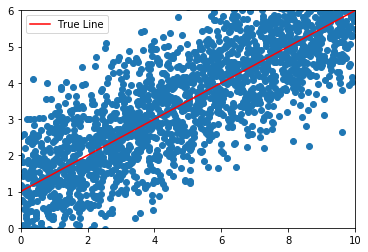

In [2]:
def get_linear_data(w, b, n_samples, max_x):
    x = np.random.rand(n_samples, len(w)) * max_x
    noise = np.random.randn(len(x))
    y = b + x.dot(w) + noise
    return x, y


# np.random.seed(2)
n_samples = 2000

w = np.array([0.5])
b = 1
max_x = 10

x, y = get_linear_data(w, b, n_samples, max_x)
y_true = b + x.dot(w)

plt.scatter(x, y)
plt.plot([0, 10], [b, b+10*w], 'r', label='True Line')
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.legend();

What is the Squared loss of the true line on the observed data?

In [3]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_true)

0.9948801361442541

# Linear Regression

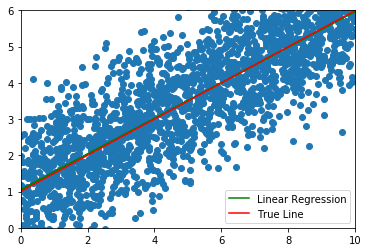

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

y_pred = regressor.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, 'g', label='Linear Regression')
plt.plot([0, 10], [b, b+10*w], 'r', label='True Line')
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.legend();

What is the squared loss of the linear regressor on the observed data?

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.9943318518890542

In [6]:
regressor.coef_, regressor.intercept_

(array([0.49284437]), 1.04668431649527)

The linear regression learning algorithm finds the best line to fit the data

# Train-Test

In [7]:
# np.random.seed(4)
n_train = 20
n_test = 50

w = np.array([0.5])
b = 1
max_x = 10

x_train, y_train = get_linear_data(w, b, n_train, max_x)
x_test, y_test = get_linear_data(w, b, n_test, max_x)
y_true = b + x_test*w

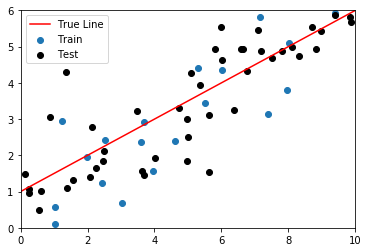

In [8]:
plt.scatter(x_train, y_train, label='Train')
plt.scatter(x_test, y_test, color='k', label='Test')
plt.plot([0, 10], [b, b+10*w], 'r', label='True Line')
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.legend();

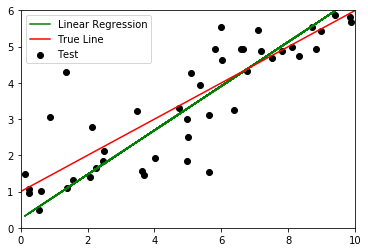

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)


plt.plot(x_test, y_pred, 'g', label='Linear Regression')
plt.scatter(x_test, y_test, color='k', label='Test')
plt.plot([0, 10], [b, b+10*w], 'r', label='True Line')
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.legend();

Which line has better performance on test?

In [10]:
mean_squared_error(y_test, y_pred)

0.9702141613676684

In [11]:
mean_squared_error(y_test, y_true)

0.9115029956428523

The linear regression found the best fit for the train data, the test data though has different noise values and hence the "true line" outperforms it on test

# Non Linear

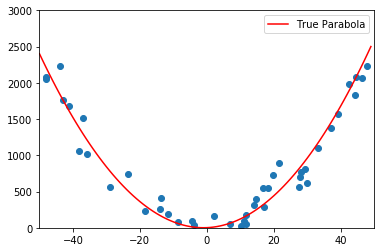

In [12]:
def get_parabola_data(a, b, c, n_samples):
    x = np.random.rand(n_samples, len(w)) *100 - 50
    x = np.sort(x)
    noise = np.random.randn(len(x)).reshape(-1, 1)*200
    y = a*(x**2) + b*x + c + noise
    return x, y


def get_true_parabola(a, b, c):
    xs, ys = [], []
    for x in range(-50,50,1):
        y = a*(x**2) + b*x + c
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


np.random.seed(0)
n_samples = 50

w = np.array([0.5])
b = 1
max_x = 10
a, b, c = 1, 2, 2

x, y = get_parabola_data(a, b, c, n_samples)
x_p, y_p = get_true_parabola(a, b, c)
plt.scatter(x, y)
plt.plot(x_p, y_p, color='r', label='True Parabola')
plt.xlim(-50, 50)
plt.ylim(0, 3000)
plt.legend();

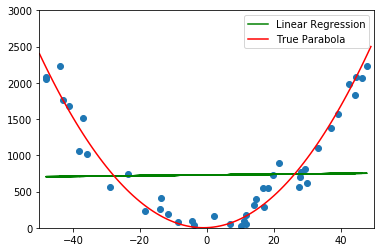

In [13]:
regressor = LinearRegression()
regressor.fit(x, y)

y_pred = regressor.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, 'g', label='Linear Regression')
plt.plot(x_p, y_p, color='r', label='True Parabola')
plt.xlim(-50, 50)
plt.ylim(0, 3000)
plt.legend();

Running linear regression on the raw data fails dramatically <br>
Let's add $x^2$ as an additional feature

In [14]:
data = pd.DataFrame({'x':x.reshape(-1), 'y':y.reshape(-1)})
sample = data.sample(10)
sample

,x,y
23,28.052918,764.715835
43,-43.977453,2227.239288
39,18.182030,549.115569
26,-35.664671,1021.179761
44,16.676672,549.220631
35,11.763550,48.138268
2,10.276338,26.225353
4,-7.634520,-205.542216
47,-37.107370,1515.632531
0,4.881350,-305.663756


In [15]:
data['x_squared'] = data.x**2
data = data[['x', 'x_squared', 'y']]
data.loc[sample.index]

,x,x_squared,y
23,28.052918,786.966187,764.715835
43,-43.977453,1934.016358,2227.239288
39,18.182030,330.586212,549.115569
26,-35.664671,1271.968776,1021.179761
44,16.676672,278.111374,549.220631
35,11.763550,138.381102,48.138268
2,10.276338,105.603115,26.225353
4,-7.634520,58.285897,-205.542216
47,-37.107370,1376.956926,1515.632531
0,4.881350,23.827582,-305.663756


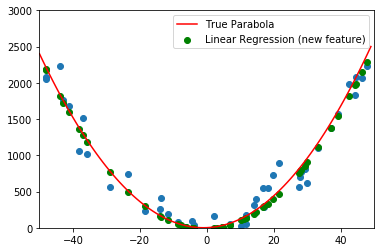

In [16]:
regressor = LinearRegression()
x_new = data[['x','x_squared']]
regressor.fit(x_new, y)

y_pred = regressor.predict(x_new)
plt.scatter(x, y)
plt.scatter(x, y_pred, c='g', label='Linear Regression (new feature)')
plt.plot(x_p, y_p, color='r', label='True Parabola')
plt.xlim(-50, 50)
plt.ylim(0, 3000)
plt.legend();

In [17]:
regressor.coef_, regressor.intercept_

(array([[1.36635147, 0.97861235]]), array([-13.93350172]))

Adding the "missing" feature ($x^2$) allows the model to fit the data well

# Overfit

To illustrate Lasso, we will ask for bigger $x$ vectors of dimension $d=10$

In [18]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [19]:
np.random.seed(0)
w = np.array([1, 0, 0, 0, 3, 0, 0, 0, 0, 1])
b = 1
n_train = 20
n_test = 100
max_x = 10

x_train, y_train = get_linear_data(w, b, n_train, max_x)
x_test, y_test = get_linear_data(w, b, n_test, max_x)
x_train.shape, y_train.shape

((20, 10), (20,))

In [20]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('Linear regression solution: b = {0:.2f}, w={1}'.format(regressor.intercept_, regressor.coef_.round(2)))
print('mean_squared_error = {0:.4f}'.format(mean_squared_error(y_test, y_pred)))

Linear regression solution: b = 0.50, w=[ 1.13 -0.17  0.03  0.06  2.93  0.16  0.05 -0.12  0.13  0.84]
mean_squared_error = 1.7455


In [21]:
from sklearn.linear_model import Lasso
tradeoff_parameter = 0.5
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('train mean_squared_error = {0:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('test mean_squared_error = {0:.4f}'.format(mean_squared_error(y_test, y_pred)))

Lasso solution: b = 2.31, w=[ 0.98 -0.02  0.01  0.03  2.91  0.   -0.   -0.    0.    0.8 ]
train mean_squared_error = 0.7972
test mean_squared_error = 1.2188


Lasso found a simpler model that achieved better performance on test, let's see compare the weights

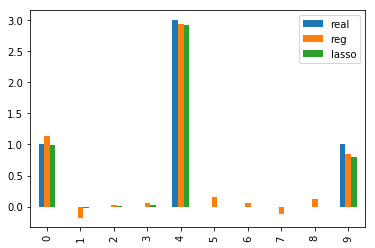

In [22]:
pd.DataFrame({'real':w, 'reg':regressor.coef_, 'lasso':lasso.coef_}).plot.bar();